In [2]:
#packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#setup plot figures
figsize = (10, 10)
plt.style.use('seaborn-v0_8-whitegrid')

### ACC, APL & Small Worldness

In [4]:
paths = [{"marker": 'o',"label": "gsw", "path": "results/gsw-ppo/result/history0.txt"},
         {"marker":'^',"label": "nsw", "path":"results/nsw-ppo/result/history0.txt"}, 
         {"marker":'x',"label": "ppo", "path":"results/ppo/result/history0.txt"}]

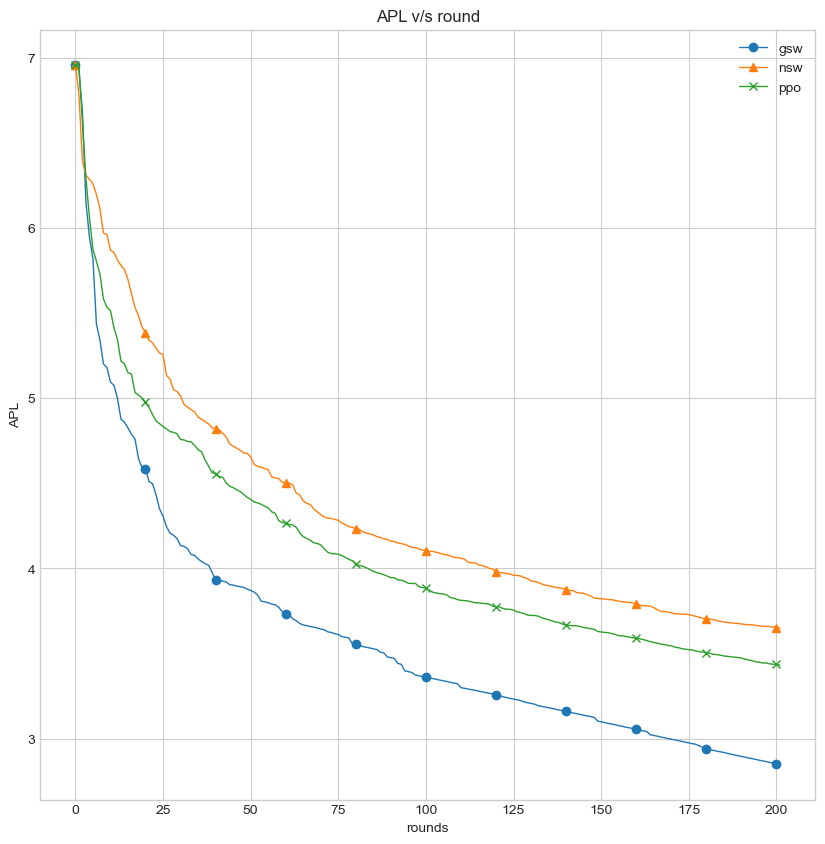

In [5]:
plt.figure(figsize=figsize)
for path in paths:
# path = paths[0]
	df = pd.read_csv(path["path"])
	plt.plot(df['no.'], df['apl'],marker = path['marker'] ,label =path["label"],lw = 1, markevery=20)
plt.legend()
plt.xlabel("rounds")
plt.ylabel("APL")
plt.title("APL v/s round")
plt.savefig(fname="results/final/APL_v_rounds.svg", format="svg")

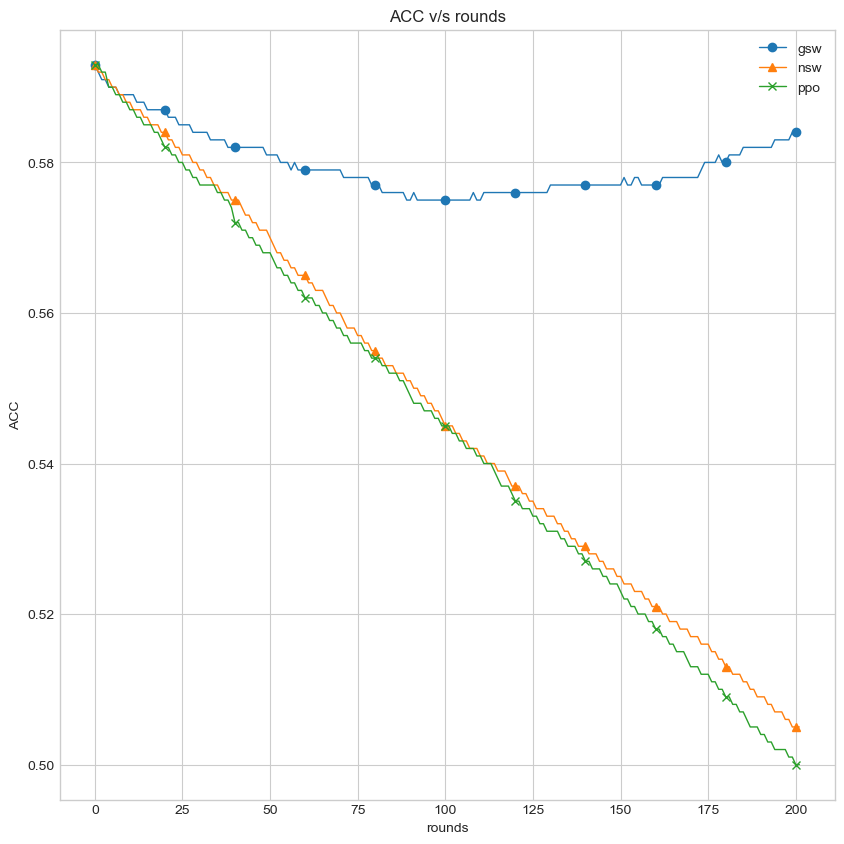

In [6]:
plt.figure(figsize=figsize)
for path in paths:
# path = paths[0]
	df = pd.read_csv(path["path"])
	plt.plot(df['no.'], df['acc'],marker = path['marker'] ,label =path["label"],lw = 1, markevery=20)
plt.legend()
plt.xlabel("rounds")
plt.ylabel("ACC")
plt.title("ACC v/s rounds")
plt.savefig(fname="results/final/ACC_v_rounds.svg", format="svg")

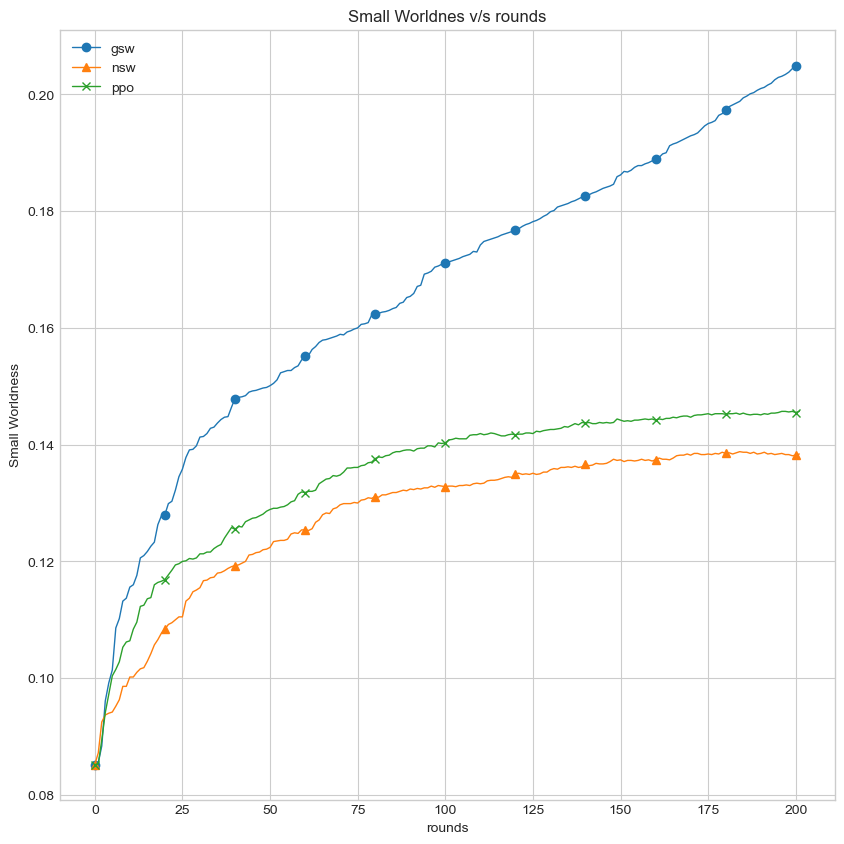

In [7]:
plt.figure(figsize=figsize)
for path in paths:
	df = pd.read_csv(path["path"])
	plt.plot(df['no.'], df['small_worldness'],marker = path['marker'] ,label =path["label"],lw = 1, markevery=20)
plt.legend()
plt.xlabel("rounds")
plt.ylabel("Small Worldness")
plt.title("Small Worldnes v/s rounds")
plt.savefig(fname="results/final/Small Worldness_v_rounds.svg", format="svg")

## Simulation Results

In [8]:
paths = [
    {
        "marker": 'o',
    	"label": "gsw", 
        "ppath": "results/gsw-ppo/result/",
		"direct-cl": "direct/direct-cl-performance.npy",
		"direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/0-performance.npy",
		"leach": "",
		
        
    },
	{
        "marker":'^',
        "label": "nsw", 
        "ppath":"results/nsw-ppo/result/",
        "direct-cl": "direct/direct-cl-performance.npy",
        "direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/0-performance.npy",
		"leach": "",
		
		
    }, 
	{	
        "marker":'x',
        "label": "ppo", 
        "ppath":"results/ppo/result/",
        "direct-cl": "direct/direct-cl-performance.npy",
        "direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/0-performance.npy",
		"leach": "",
		
		
    },
	{	
        "marker":'s',
        "label": "conventional", 
        "ppath":"results/conventional/result/",
		"direct-cl": "direct/direct-cl-performance.npy",
		"direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/fl-performance.npy",
		"leach": "",
		
    },
]

### Latency

For Centralised Learning

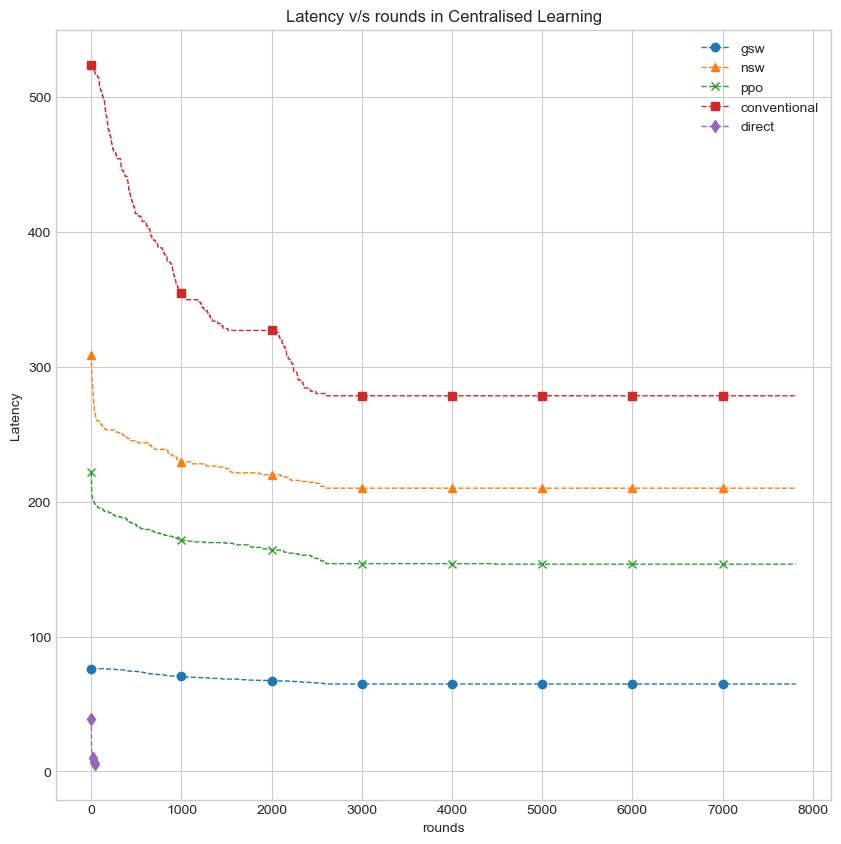

In [9]:
plt.figure(figsize=(10,10))
for path in paths:
	p = path["ppath"] + path["multihop-cl"]
	df = np.load(p, allow_pickle=True).item()
	# x = np.linspace(0, 7814, 7814)
	plt.plot( df['latency'], marker = path['marker'], lw=1,label = path['label'], markevery=1000, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-cl"]
df = np.load(p, allow_pickle=True).item()
# x = np.linspace(0, 7814, 7814)
plt.plot( df['latency'], marker = 'd', lw=1,label = "direct", markevery=15, linestyle = 'dashed')

plt.xlabel("rounds")
plt.ylabel("Latency")
plt.title("Latency v/s rounds in Centralised Learning")
plt.legend()
plt.savefig(fname="results/final/Latency_v_rounds_cl.svg", format="svg")

Federated Learning

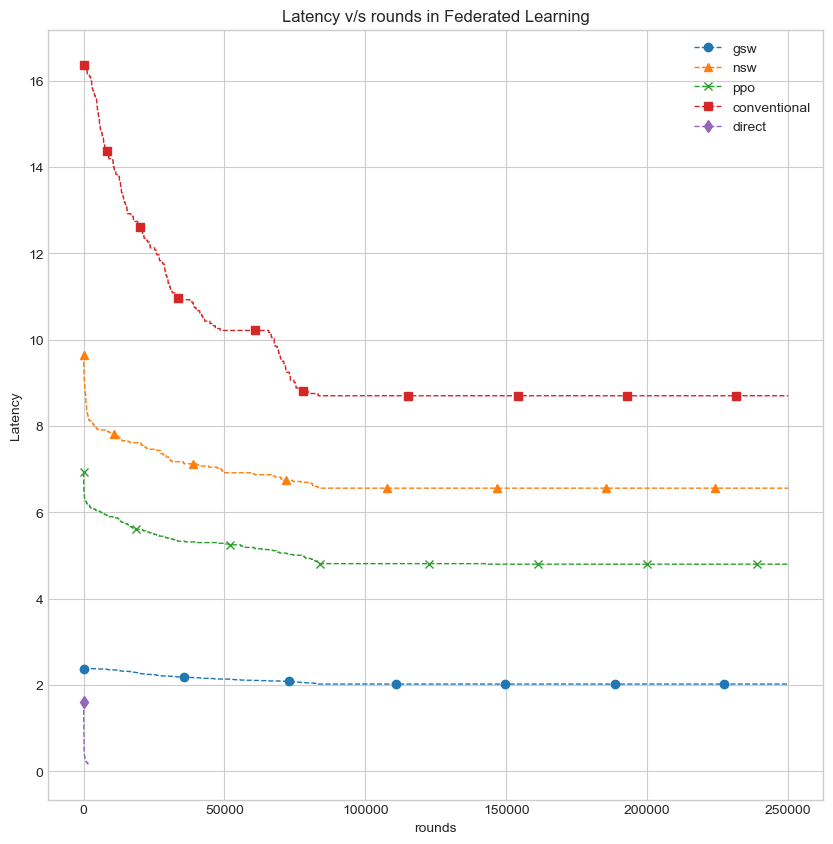

In [10]:
plt.figure(figsize=(10,10))
for path in paths:
	p = path["ppath"] + path["multihop-fl"]
	l = np.load(p, allow_pickle=True).item()
	x = [i for i in range(len(l['latency']))]
	# print(path['label'], len(x), len(l['latency']))
	plt.plot(x, l['latency'], marker = path['marker'], lw=1, label = path['label'], markevery=0.1, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-fl"]
df = np.load(p, allow_pickle=True).item()
x = np.linspace(0, 1755, 1755)
plt.plot(x, df['latency'], marker = 'd', lw=1,label = "direct", markevery=0.75, linestyle = 'dashed')

plt.xlabel("rounds")
plt.ylabel("Latency")
plt.title("Latency v/s rounds in Federated Learning")
plt.legend()
# plt.savefig(fname="results/final/Latency_v_rounds-fl.svg", format="svg")


### Energy

Centralised Learning

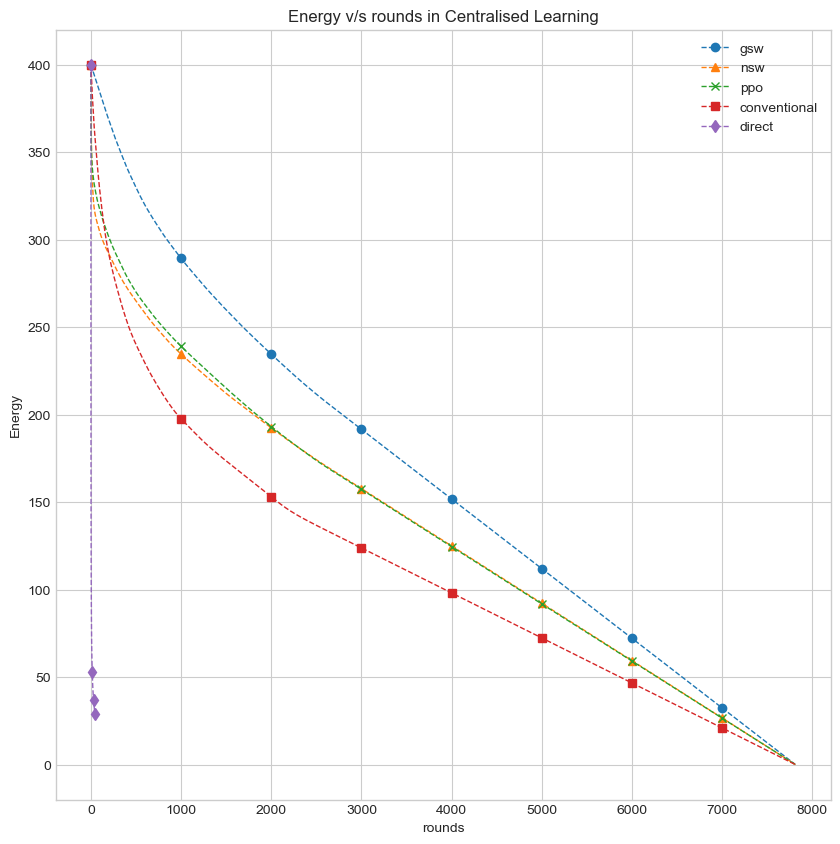

In [11]:
plt.figure(figsize=(10,10))
for path in paths:
	p = path["ppath"] + path["multihop-cl"]
	df = np.load(p, allow_pickle=True).item()
	# x = np.linspace(0, 7814, 7814)
	plt.plot( df['energy'], marker = path['marker'], lw=1,label = path['label'], markevery=1000, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-cl"]
df = np.load(p, allow_pickle=True).item()
df['energy'].insert(0,400)
# x = np.linspace(0, 7814, 7814)
plt.plot( df['energy'], marker = 'd', lw=1,label = "direct", markevery=15, linestyle = 'dashed')

plt.xlabel("rounds")
plt.ylabel("Energy")
plt.title("Energy v/s rounds in Centralised Learning")
plt.legend()
plt.savefig(fname="results/final/Energy_v_rounds_cl.svg", format="svg")

Federated Learning

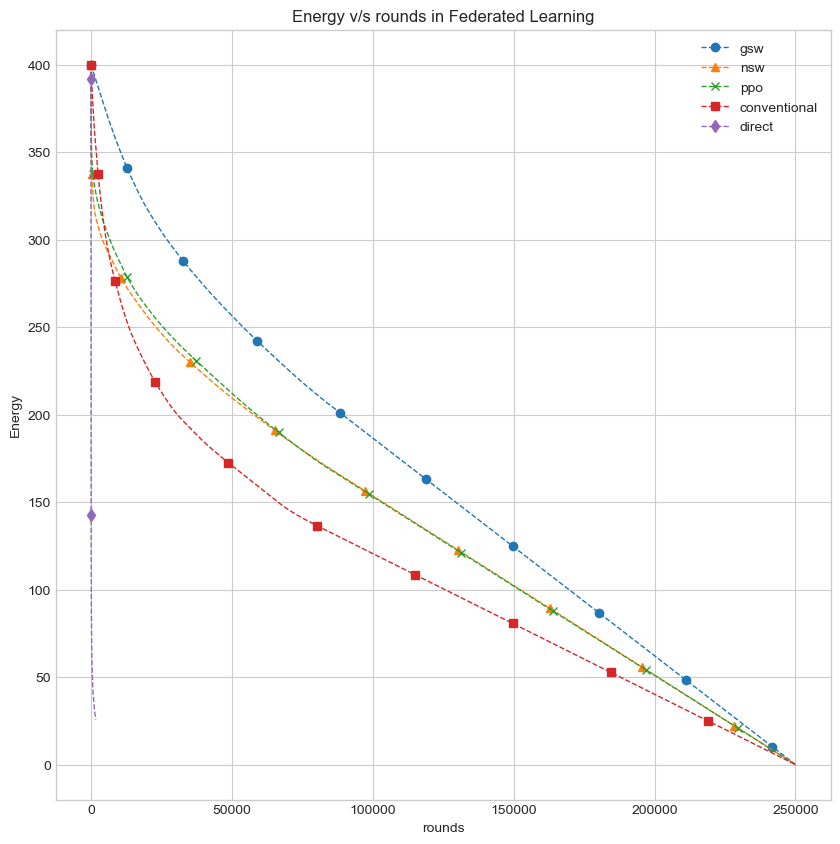

In [12]:
plt.figure(figsize=(10,10))
for path in paths:
	p = path["ppath"] + path["multihop-fl"]
	df = np.load(p, allow_pickle=True).item()
	# x = np.linspace(0, 7814, 7814)
	plt.plot(df['energy'], marker = path['marker'], lw=1,label = path['label'], markevery=0.1, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-fl"]
df = np.load(p, allow_pickle=True).item()
# x = np.linspace(0, 7814, 7814)
plt.plot( df['energy'], marker = 'd', lw=1,label = "direct", markevery=0.4, linestyle = 'dashed')

plt.xlabel("rounds")
plt.ylabel("Energy")
plt.title("Energy v/s rounds in Federated Learning")
plt.legend()
plt.savefig(fname="results/final/Energy_v_rounds_fl.svg", format="svg")

### Throughput

Centralised Learning

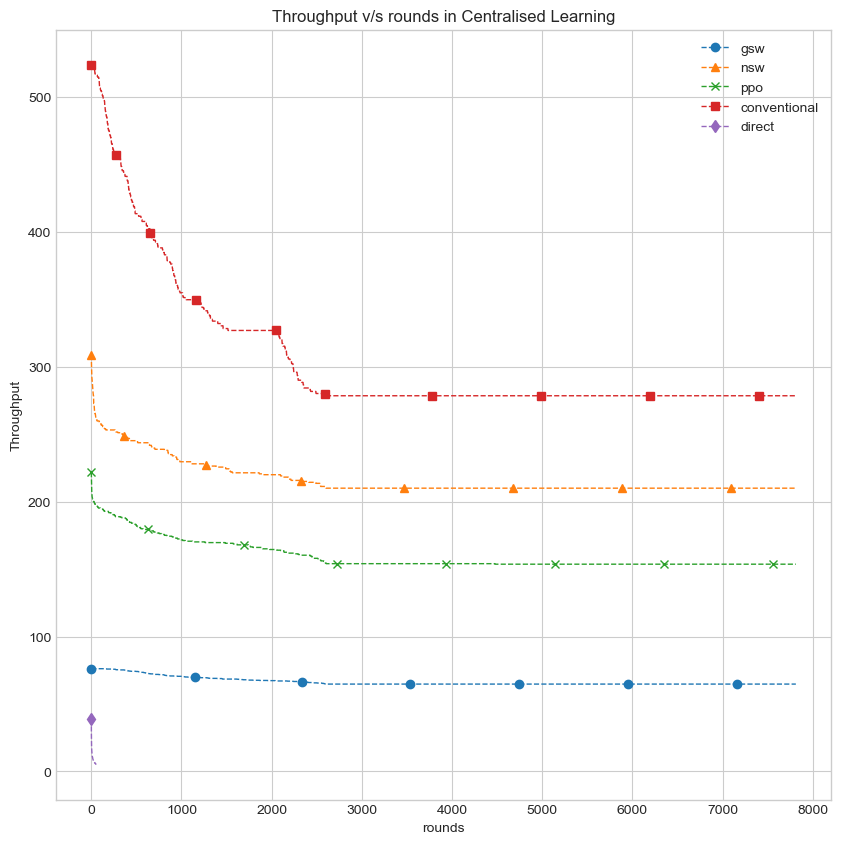

In [15]:
plt.figure(figsize=(10,10))

for path in paths:
	p = path["ppath"] + path["multihop-cl"]
	l = np.load(p, allow_pickle=True).item()
	x = [i for i in range(len(l['latency']))]
	# print(path['label'], len(x), len(l['latency']))
	plt.plot(x, l['latency'], marker = path['marker'], lw=1, label = path['label'], markevery=0.1, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-cl"]
df = np.load(p, allow_pickle=True).item()
# x = np.linspace(0, 1755, 1755)
plt.plot(df['latency'], marker = 'd', lw=1,label = "direct", markevery=0.75, linestyle = 'dashed')

plt.xlabel("rounds")
plt.ylabel("Throughput")
plt.title("Throughput v/s rounds in Centralised Learning")
plt.legend()
plt.savefig(fname="results/final/Throughput_v_rounds-cl.svg", format="svg")

Federated Learning

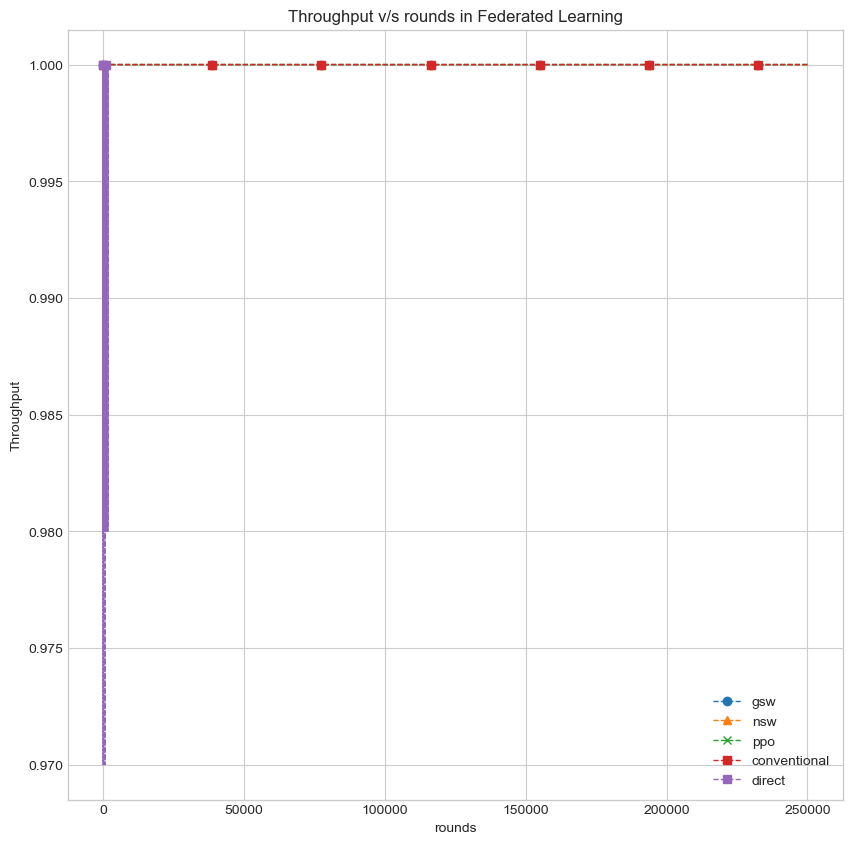

cnt:  0


In [17]:
cnt = 0
plt.figure(figsize=(10,10))
for path in paths:
	p = path["ppath"] + path["multihop-fl"]
	l = np.load(p, allow_pickle=True).item()
	y = [x[-1] for x in l['throughput']]
	for _ in y:
		if _ != l['throughput'][0][-1]:
			cnt += 1
	x = [i for i in range(len(y))]
	plt.plot(x, y, marker = path['marker'], lw = 1, label=path['label'], markevery=0.1, linestyle = 'dashed')


p = path["ppath"] + path["direct-fl"]
l = np.load(p, allow_pickle=True).item()
y = [x[-1] for x in l['throughput']]
x = [i for i in range(len(y))]
plt.plot(x, y, marker = path['marker'], lw = 1, label="direct", markevery=1000, linestyle = 'dashed')

plt.xlabel("rounds")
plt.ylabel("Throughput")
plt.title("Throughput v/s rounds in Federated Learning")
plt.legend()
plt.show()

print("cnt: ", cnt)

In [ ]:
plt.figure(figsize=(10,10))

for path in paths:
	p = path["ppath"] + path["multihop-fl"]
	l = np.load(p, allow_pickle=True).item()
	x = [i for i in range(len(l['throughput']))]
	# print(path['label'], len(x), len(l['latency']))
	plt.plot(x, l['latency'], marker = path['marker'], lw=1, label = path['label'], markevery=0.1, linestyle = 'dashed')

path = paths[-1]
p = path["ppath"] + path["direct-fl"]
df = np.load(p, allow_pickle=True).item()
x = np.linspace(0, 1755, 1755)
plt.plot(x, df['latency'], marker = 'd', lw=1,label = "direct", markevery=0.75, linestyle = 'dashed')

plt.xlabel("rounds")
plt.ylabel("Throughput")
plt.title("Throughput v/s rounds in Federated Learning")
plt.legend()
plt.savefig(fname="results/final/Throughput_v_rounds-fl.svg", format="svg")

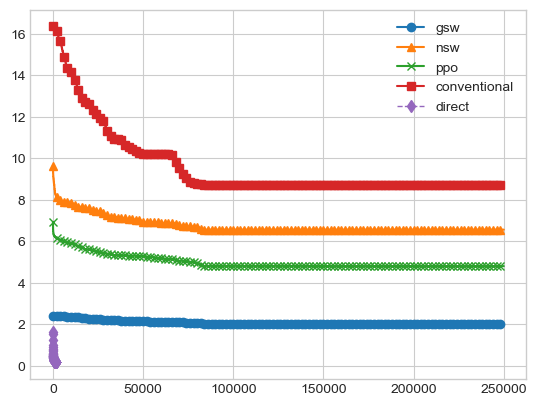

In [ ]:
for path in paths:
	p = path["ppath"] + path["multihop-fl"]
	l = np.load(p, allow_pickle=True).item()
	x = [i for i in range(len(l['latency']))]
	plt.plot(l['latency'], marker=path['marker'], label = path['label'], markevery =2000)
path = paths[-1]
p = path["ppath"] + path["direct-fl"]
df = np.load(p, allow_pickle=True).item()
# x = np.linspace(0, 1755, 1755)
plt.plot(df['latency'], marker = 'd', lw=1,label = "direct", markevery=15, linestyle = 'dashed')
plt.legend()

TEST

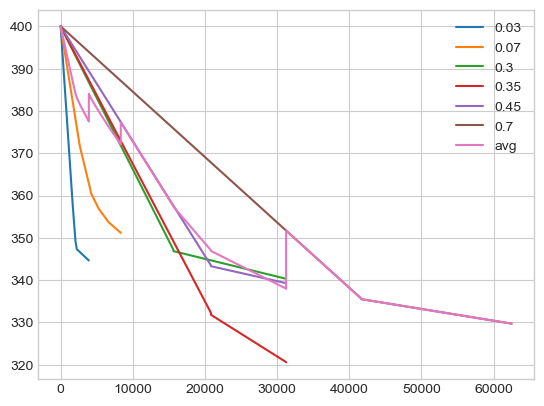

In [ ]:
P = [0.03, 0.3, 0.7, 0.07, 0.35, 0.45]
P.sort()
l = []
for p in P:
	path = "results/conventional/result/leach/"+ str(p) + "/fl-performance.npy"
	df = pd.DataFrame(np.load(path, allow_pickle=True).item())
	l.append(df['energy'].values.tolist())
	# l.append([x[-1] for x in df['throughput'].values.tolist()])
	plt.plot(l[-1], label = str(p))
from itertools import zip_longest
outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
plt.plot(outcome, label = "avg")
plt.legend()

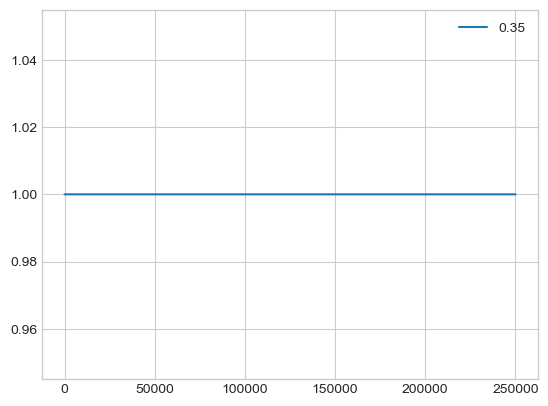

In [ ]:
from itertools import zip_longest
outcome = [np.nanmean(n) for n in zip_longest(l[0], l[1], l[2], l[3], l[4], l[5], fillvalue=float("nan"))]
plt.plot(outcome, label = "avg")
path = "results/conventional/result/leach/"+ str(0.35) + "/fl-performance.npy"
df = pd.DataFrame(np.load(path, allow_pickle=True).item())
l.append([x[-1] for x in df['throughput'].values.tolist()])
plt.plot(df['energy'], label = "0.35")
plt.legend()

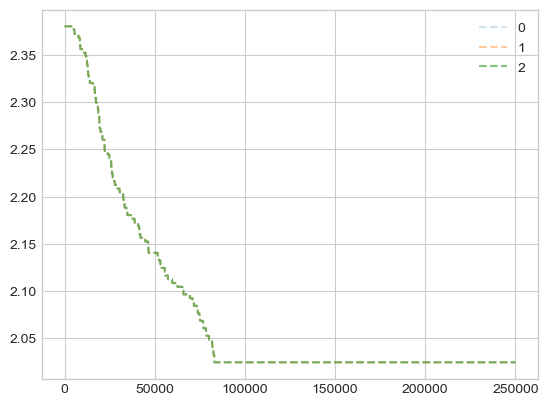

In [ ]:
for i in range(0,3):
	p="results/gsw-ppo/result/multihop/" + str(i) + "-performance.npy"
	l = np.load(p, allow_pickle=True).item()
	x = [i for i in range(len(l['latency']))]
	
	plt.plot(l['latency'], label = str(i), linestyle = 'dashed', alpha = 0.2*(i+1))
plt.legend()

In [ ]:
l = np.load(paths[-1]['ppath'] + paths[-1]["direct-fl"], allow_pickle=True).item()
l

{'lifetime': 1755,
 'energy': [391.9715685834147,
  383.9431371668295,
  375.9147057502441,
  367.8862743336587,
  359.85784291707364,
  351.8294115004886,
  343.80098008390297,
  335.77254866731755,
  327.74411725073253,
  319.7597939953649,
  312.0625427406975,
  304.62457841033944,
  297.5159114320339,
  290.68298542176683,
  284.11119023901966,
  277.7567058937481,
  271.67867104991046,
  265.7879071213554,
  260.2495766144272,
  254.92891480842613,
  249.88724189168826,
  245.0018216709796,
  240.19746964833135,
  235.53705636357358,
  231.0231057810288,
  226.62238390277665,
  222.3596288846121,
  218.2970995343581,
  214.44900409455462,
  210.8757377335098,
  207.42562786612146,
  204.21063279219334,
  201.14021777092674,
  198.27327250871883,
  195.50051798381364,
  192.8231985931048,
  190.17939855402446,
  187.57986018329404,
  185.06023091135924,
  182.66392439858294,
  180.41974201317697,
  178.21383881055525,
  176.05497209477733,
  173.974946318614,
  171.98185004011017,


graph plotted!


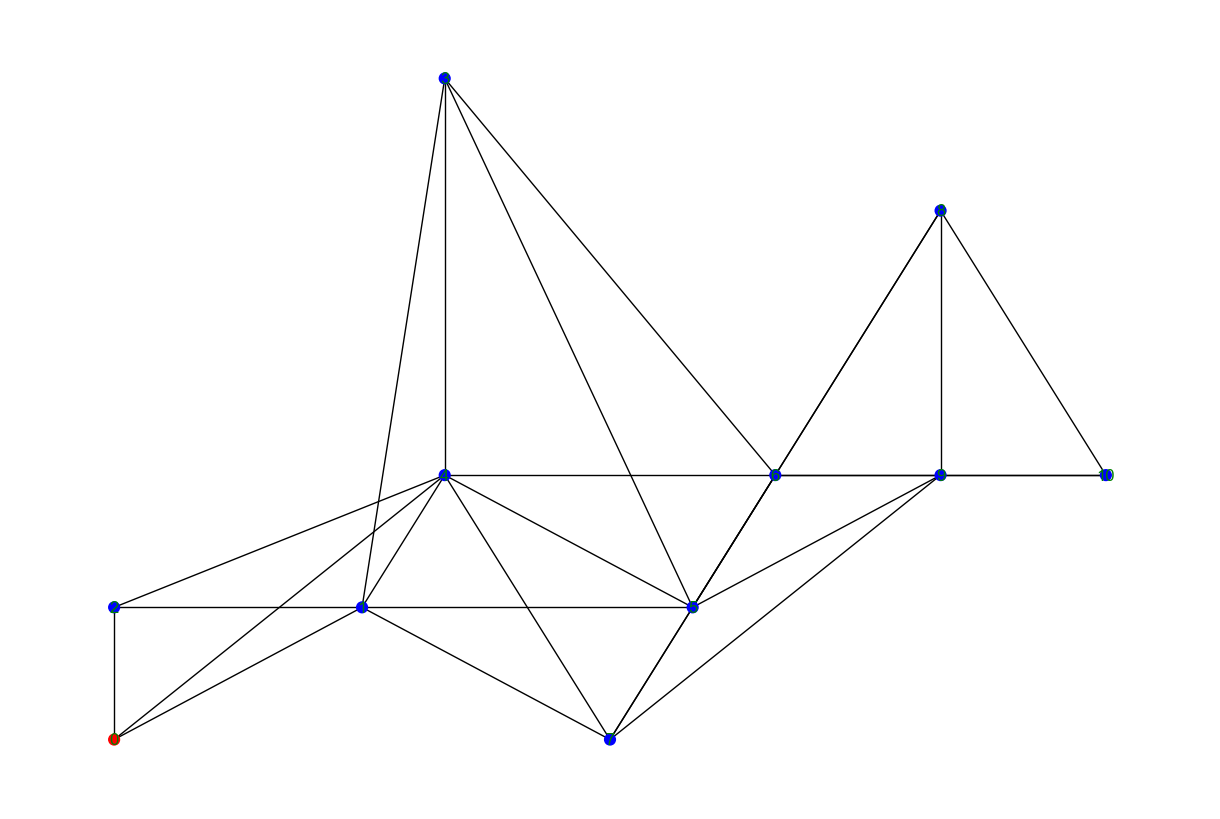

In [18]:
from network import *
net1 = network(50,50,10,0,0)
net1.initialise_nodes(0.25,0)
net1.set_parameters(2000, 8, 2000, 3*1e8, 5)
net1.set_nxg()
net1.show_graph()

In [19]:
net = net1
e = 0
for Node in net.node_list:
	Node.critical_energy = 0.0
	e += Node.current_energy

In [20]:
net.packet_length = 1024
sink = net.sink
dead_node = set()
k = net.packet_length
rnds = 0

In [21]:
er = sink.energy_for_reception(k)
n = net.number_of_nodes
n_map = net.node_map
net.calculate_latency()
lm = net.latency_matrix
dm = net.calculate_dist()
energy_per_round = [e]
latency_per_round = []
throughput_per_round = []
total_latency = 0

In [22]:
from networkx import NetworkXError
while len(dead_node) < 0.9*n:
	message_gen = n - len(dead_node)
	s_trans = 0
	e = 0
	l = 0
	failed_msg = 0
	for node in net.node_list:
		if node in dead_node:
			continue
		path = nx.shortest_path(net.nxg, 0, node.id)
		path.reverse()
		curr = net.node_map[path.pop()]
		fail = 0
		while len(path) != 0:
			next = net.node_map[path.pop()]
			if next.current_energy < next.critical_energy or curr.current_energy < curr.critical_energy:
				fail = 1
				break
			l += lm[curr.id][next.id]
			curr.current_energy -= curr.energy_for_transmission(k, next.dist(curr))
			next.current_energy -= er
			curr = next
		if curr != sink or fail == 1:
			et = node.energy_for_transmission(k, dm[node.id][sink.id])
			if et > node.current_energy:
				failed_msg += 1
				dead_node.add(node)
				try:
					net.nxg.remove_node(node)
				except NetworkXError:
					print(node.id)
			else:
				node.current_energy -= et
				s_trans += 1
				continue
	for node in net.node_list:
		e += max(node.current_energy, node.critical_energy)
		if node.current_energy <= node.critical_energy:
			dead_node.add(node)
			
	latency_per_round.append(l)
	energy_per_round.append(e)
	throughput_per_round.append([message_gen, s_trans, s_trans/message_gen, failed_msg])
	total_latency+= l
	e = 0
	l = 0
	s_trans = 0
	failed_msg=0
	rnds += 1

2
6
5
10
3
7
8
9


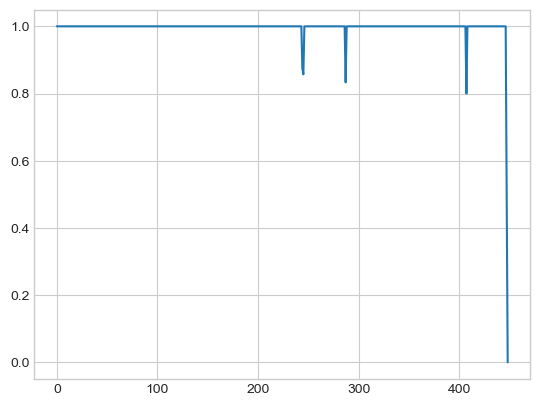

In [23]:
plt.plot([x[-2] for x in throughput_per_round])